# Monte Carlo Simulation of Two-dimensional Ising Model
# Boyao Zhu
# Department of Physics & Astronomy
# Michigan State University


### Introduction 

The aim of this project is to study a widely popular model to simulate transitions, the so-called Ising model in two dimension.  At a given critical temperature, this model exhibits a phase transition from a magnetic phase(a system with a finite magnetic moment) to a phase with zero magnetization.

In its simplest form the energy of the Ising Model is expressed as, without extrenally applied magnetic field,  
$$ \mathbf{E} = -J \sum_{<kl>}^N\sigma_k\sigma_l $$
The quantity N represents the total number of spins and J is the coupling constant expressing the strength of the interaction between neighboring spins. The symbol < kl > indicates that we only sum over nearest neighbors only.  We will assume that we have a ferromagnetic ordering, J>0.  We will use periodic boundary conditions and the Metropolis algorithm only.  



Only one- and two-dimensional cases has been solved analytically and they show several interesting properties of phase transition
$$ T_c/J = \frac{2}{log(1+\sqrt2)} \approx 2.26$$

Therefore, it is necessary to develop an efficient numerical method for the simulation of Ising model

In this work we focus on the Monte Carlo simulation of 2D Ising model.

### Monte Carlo methods for Ising model

1. Establish an inital state with energy $E_b$ by positioning yourself at a random configuraion in the lattice
2. Change the initial configuration by flipping e.g., one spin only.  Compute the energy of this trial state $E_t$
3. Calculate $\Delta E = E_t-E_b$.  The number of values $\Delta E$ is limited to five for the Ising model in two dimensions
4. If $\Delta E \leq 0$ we accept the new configuration, meaning that the energy is lowered and we are hopyfully moving towards the minimum energy at a given temperature
5. if $\Delta E > 0$, calculate $ w = e^{(-\beta\Delta E)}$
6. Compare $w$ with a random number r. if
$$r \leq w$$
then accept the new configuration, else we keep the old configuration
7. repeated (2)-(6) in order to obtain a sufficiently good representation of states

This we do as follows: We place the N particles in any configuration, for example, in a square lattice.  Then we move each of the particles in succession...  We then calcualte the change energy of the system $\Delta E$, which is caused by the move.  If $\Delta E<0$, we allow the move and put the particle in its new position.  If $\Delta E>0$, we allow the move with probability $exp(-\Delta E/kT)$...  Then, whether the move has been allowed or not, we consider that we are in a new configuration for the purpose of taking our averages.

### Implementation
I address this problem by frequently starting the simulation from a random configuration.  After beginning, the simulation is run for a fixed number of iterations(5000 in my case), and then the simulation is considered finished and the propertie of interest are calculated from the final configuration.

The Metroplis algorithm specifies that transitions must be made $\mathbf{one}$ at a time. While I consider transitions of many site simultaneously, we would rapidly find ourselves in a regime of oscillating behavior.  For example, nearly every site that is flipped in the direction of higher energy would be unflipped on the next iteraction.  However, it is somewhat computationally desirable to perform transitions on every lattice simultaneously, such simultaneous transitions may take advantage of vectorized operations for increased computational efficiency.  

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from IPython.display import display, clear_output


# define Ising model with dimension of lattice and Temperature as its parameters
def Ising(dim, T):
    # set J and K equal 1 for simplicity
    J = 1.0
    K = 1.0
    # Create random configuration 
    spin = (np.random.uniform(0,1,[dim,dim]) < 0.5)*(2)-1
    # Metropolis Algorithm
    for i in range(5000):
        
        spin_up = np.roll(spin, 1, axis=0)
        spin_down = np.roll(spin, -1, axis=0)
        spin_left = np.roll(spin, -1, axis=1)
        spin_right = np.roll(spin, 1, axis=1)
        # \Delta U = 2J*spin[i,j]*(spin_left+spin_right+spin_up+spin_down)
        neighbors = spin_up+spin_down+spin_left+spin_right
        DeltaE = 2*J*(spin*neighbors)
        
        p_trans = np.exp(-DeltaE/(K*T))
        # To avoid entering undesirable oscillatory regimes, I multiply every transition probability by 0.5
        transitions = (np.random.uniform(0,1,[dim,dim]) < p_trans)*(np.random.uniform(0,1,[dim,dim])<0.5)*(-2)+1 
        
        spin = spin * transitions
        
    M = np.sum(spin)
    E = -np.sum(DeltaE)/2

    return M, E, spin   
# return Magnetization and Energy of system and the spin configuration   

### Results

I implemented a Metropolis-based Monte Carlo simulation of an Ising System and used it to perform 1000 simulations.  The Figure 1 shows the magnetization per site M of the final configuration in each of simulation, each with a temperature chosen randomly between $10^{-5}$ and 5.  The energy per site is shown in Figure 2

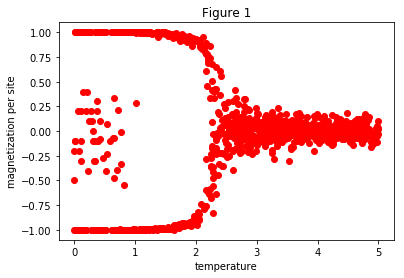

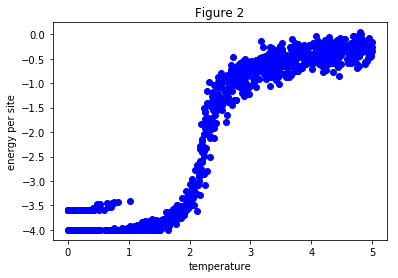

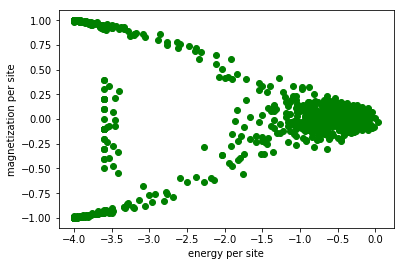

In [10]:
# set Dimension
dim = 20
Ms = []
Ts = []
Es = []

while 1:
    # create a list of temperature ranged from 0 to 5
    T = np.random.uniform(0,1)*5 + 1e-5
    # calculate M and E
    M, E, spin = Ising(dim, T)
    # append Magnetization and Energy per site 
    Ms.append(M/(dim*dim))
    Es.append(E/(dim*dim))
    Ts.append(T)
    if len(Ts) == 1000:
        break

# Make plots
plt.plot(Ts,Ms,'ro')
plt.xlabel('temperature')
plt.ylabel('magnetization per site')
plt.ylim([-1.1,1.1])
plt.title('Figure 1')
plt.show()

plt.plot(Ts,Es,'bo')
plt.xlabel('temperature')
plt.ylabel('energy per site')
plt.title('Figure 2')
plt.show()

plt.plot(Es, Ms,'go')
plt.xlabel('energy per site')
plt.ylabel('magnetization per site')
plt.show()

A phase transition is clearly visible between T=2 and T=2.5. At lower temperatures, the system strongly favors the two ground states.  These are states with all spins aligned, either all up (M = 1) or all down (M = -1).  At temperatures higher than the phase transition, the spins tend to be randomly aligned, leading to zero avarage magnetization (M = 0).

Examples Ising Model in the different temperature phase on a 100 X 100 grid is shown below

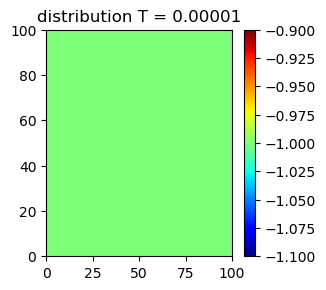

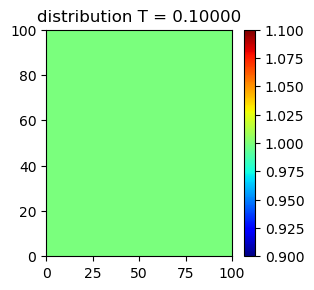

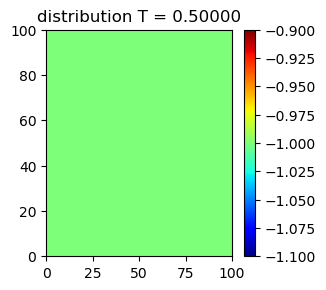

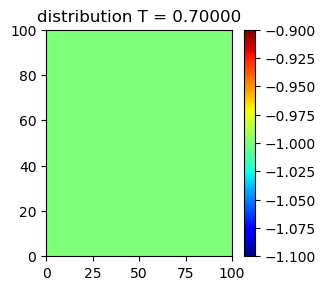

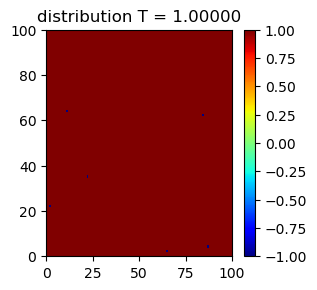

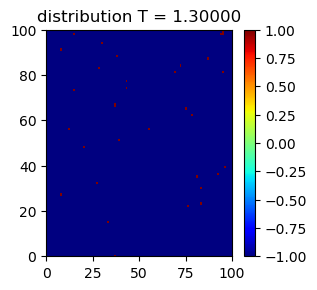

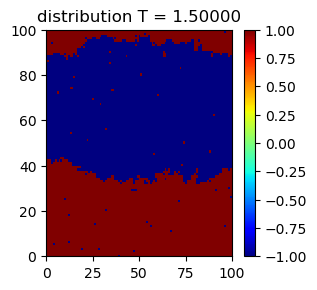

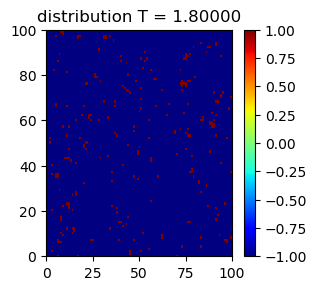

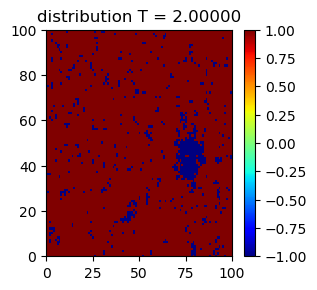

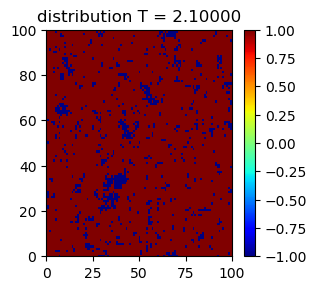

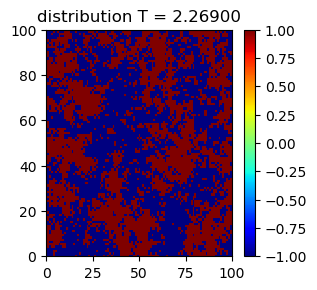

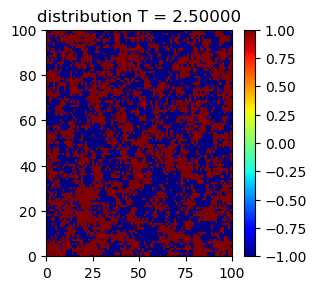

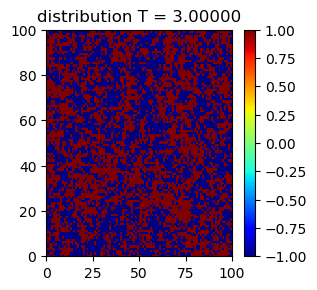

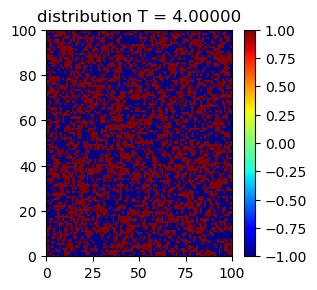

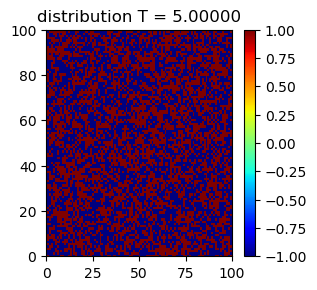

In [11]:
dim = 100

Ts = [1e-5, 0.1, 0.5, 0.7, 1, 1.3, 1.5, 1.8, 2.0, 2.1, 2.269, 2.5, 3, 4, 5]

for T in Ts:
    M, E, spin = Ising(dim, T)
    fig = plt.figure(figsize=(3, 3), dpi=100)
    plt.pcolor(spin, cmap=cm.jet)
    plt.colorbar()
    plt.title('distribution T = %1.5f' %T)

    plt.show()



At low temperatures there are almost two classes of states, either spin up (as T = 0.1), or spin down (T = 0.00001).  However, there appears to be also a class of 'metastable' states in which approximately half of the spins are up and approximately half are down.  As indicated in T = 1.5. (like some points in the middle in Figure 1)  These states account for the cluster of points around M = 0 at low temperature, and I believe the higher of the two lins in the energy plot due to the same reason.  I think these metastable states will eventualy fall down into the ground states if I apply more iterations.  Or perhaps the method I applied is not fundamental to the Metropolis, where I make transitions all site simultaneously.  

Below I showed how spin configuration evolves during Metropolis algorithm, and make plot every 100 iterations. 

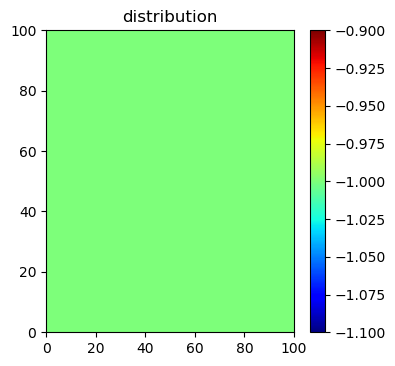

Iteration =  3341
Magnetization per site  -1.0
Energy per site  -3.9983999999999997


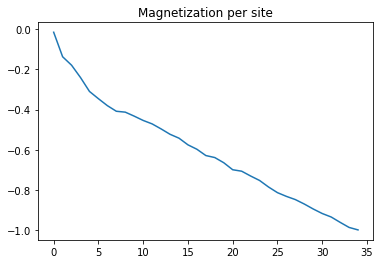

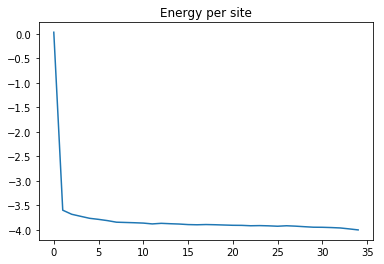

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from IPython.display import display, clear_output
import time

def Ising(dim, T):
    J = 1.0
    K = 1.0
    Ms = []
    Es = []
    
    spin = (np.random.uniform(0,1,[dim,dim]) < 0.5)*(2)-1
    i = 0
    while 1:
        
        spin_up = np.roll(spin, 1, axis=0)
        spin_down = np.roll(spin, -1, axis=0)
        spin_left = np.roll(spin, -1, axis=1)
        spin_right = np.roll(spin, 1, axis=1)
        
        neighbors = spin_up+spin_down+spin_left+spin_right
        DeltaE = 2*J*(spin*neighbors)
        
        p_trans = np.exp(-DeltaE/(K*T))
        
        transitions = (np.random.uniform(0,1,[dim,dim]) < p_trans)*(np.random.uniform(0,1,[dim,dim])<0.4)*(-2)+1
        
        spin = spin * transitions
        
        M = np.sum(spin)
        E = -np.sum(DeltaE)/2
        if abs(M/dim/dim) >= 0.9999:
            clear_output(wait=True) # Clear output for dynamic display
            fig = plt.figure(figsize=(4, 4), dpi=100)
            plt.pcolor(spin, cmap=cm.jet)
            plt.colorbar()
            plt.title('distribution')
            plt.show()
            print ("Iteration = ", i)
            print ("Magnetization per site ",M/dim/dim)
            print ("Energy per site ",E/dim/dim)
            Ms.append(M/dim/dim)
            Es.append(E/dim/dim)
            break
        
        if i%100 == 0:
            clear_output(wait=True) # Clear output for dynamic display
            fig = plt.figure(figsize=(4, 4), dpi=100)
            plt.pcolor(spin, cmap=cm.jet)
            plt.colorbar()
            plt.title('distribution')
            plt.show()
            print ("Iteration = ", i)
            print ("Magnetization per site ",M/dim/dim)
            print ("Energy per site ",E/dim/dim)
            Ms.append(M/dim/dim)
            Es.append(E/dim/dim)
        i += 1
        
        
    return Ms, Es, spin


dim = 100
T = 1
Ms, Es, spin = Ising(dim, T)
Ms = Ms
plt.plot(Ms)
plt.title('Magnetization per site')
plt.show()
#######################
Es = Es
plt.plot(Es)
plt.title('Energy per site')
plt.show()
